<a href="https://colab.research.google.com/github/anupsk5053/DL-Practice/blob/main/DL_Image_classifer_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anupsk","key":"75b997a07be4dbf1b254b03b3c4672d9"}'}

In [2]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle competitions download -c dogs-vs-cats

 97% 789M/812M [00:04<00:00, 192MB/s]
100% 812M/812M [00:04<00:00, 190MB/s]


In [6]:
!unzip -qq train.zip

In [5]:
!unzip -qq dogs-vs-cats.zip

In [7]:
#copying images to new base so that we work with smaller dataset
import os, shutil, pathlib

original_dir = pathlib.Path("/content/train")
new_base_dir = pathlib.Path("/content/cats-vs-dogs_small")

In [8]:
def make_subset(subset_name, start_index, end_index):
  for category in ("cat","dog"):
    dir = new_base_dir/subset_name/category
    os.makedirs(dir)
    fnames = [f"{category}.{i}.jpg"
              for i in range(start_index,end_index)]
    for fname in fnames:
      shutil.copyfile(src=original_dir/fname, dst=dir/fname)

In [9]:
make_subset("train",start_index = 0, end_index = 1000)
make_subset("validation",start_index = 1000, end_index = 1500)
make_subset("test",start_index = 1500, end_index = 2500)

In [10]:
# building model 
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
inputs = keras.Input(shape = (180,180,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3,activation = "relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3,activation = "relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3,activation = "relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3,activation = "relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3,activation = "relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model = keras.Model(inputs = inputs, outputs = outputs)


In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

In [23]:
from keras.mixed_precision.loss_scale_optimizer import optimizer
#complile the model
model.compile(loss = "binary_crossentropy",
              optimizer = "rmsprop",
              metrics = ["Accuracy"])

In [17]:
from tensorflow.python import image
# data preprocessing

from tensorflow.keras.utils import image_dataset_from_directory

train_dateset = image_dataset_from_directory(
    new_base_dir / "train" , 
    image_size = (180,180) ,
    batch_size = 32)

validation_dateset = image_dataset_from_directory(
    new_base_dir / "validation" , 
    image_size = (180,180) ,
    batch_size = 32)

test_dateset = image_dataset_from_directory(
    new_base_dir / "test" , 
    image_size = (180,180) ,
    batch_size = 32)


Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [18]:

#settign callbacks for preventing overfitting

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "convnet_From_scratch.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]


In [24]:
# running the model
history = model.fit(
    train_dateset , 
    epochs = 30,
    validation_data = validation_dateset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 17s 79ms/step - loss: 0.6955 - Accuracy: 0.5215 - val_loss: 0.6916 - val_Accuracy: 0.5290
Epoch 2/30
63/63 [==============================] - 4s 64ms/step - loss: 0.6950 - Accuracy: 0.5275 - val_loss: 0.6920 - val_Accuracy: 0.5030
Epoch 3/30
63/63 [==============================] - 4s 65ms/step - loss: 0.6887 - Accuracy: 0.5530 - val_loss: 0.6701 - val_Accuracy: 0.6390
Epoch 4/30
63/63 [==============================] - 5s 81ms/step - loss: 0.6711 - Accuracy: 0.6015 - val_loss: 0.6453 - val_Accuracy: 0.6330
Epoch 5/30
63/63 [==============================] - 4s 62ms/step - loss: 0.6355 - Accuracy: 0.6375 - val_loss: 0.5964 - val_Accuracy: 0.6770
Epoch 6/30
63/63 [==============================] - 4s 67ms/step - loss: 0.6170 - Accuracy: 0.6670 - val_loss: 0.5996 - val_Accuracy: 0.6730
Epoch 7/30
63/63 [==============================] - 5s 66ms/step - loss: 0.5750 - Accuracy: 0.6985 - val_loss: 0.5848 - val_Accuracy: 0.6890
Epoch 8/30
6

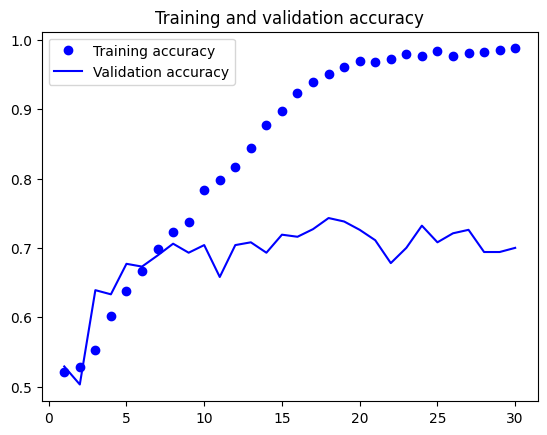

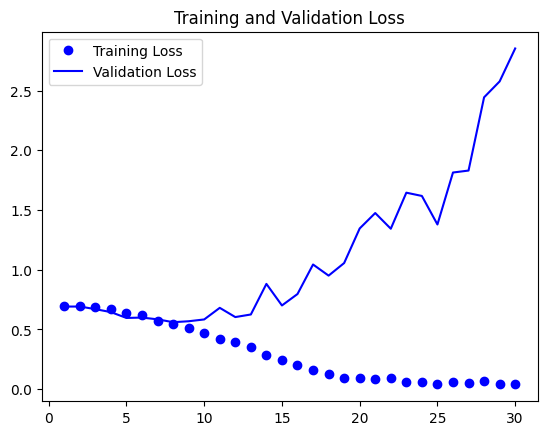

In [38]:
import matplotlib.pyplot as plt
accuracy = history.history['Accuracy']
val_accuracy = history.history['val_Accuracy']
loss = history.history['loss']
val_loss = history.history["val_loss"]
epochs = range ( 1 , len(accuracy)+1 )

plt.plot(epochs, accuracy, "bo", label = "Training accuracy")
plt.plot(epochs, val_accuracy, "b", label = "Validation accuracy")
plt.title ("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss, "bo",label = "Training Loss")
plt.plot(epochs,val_loss, "b",label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [55]:
#model Evlaution
test_model = keras.models.load_model("convnet_From_scratch.keras")
test_loss , test_acc = test_model.evaluate(test_dateset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 39ms/step - loss: 0.5697 - Accuracy: 0.7095
Test accuracy: 0.710


In [39]:
# augmenting some data 

data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2)
    ]
)

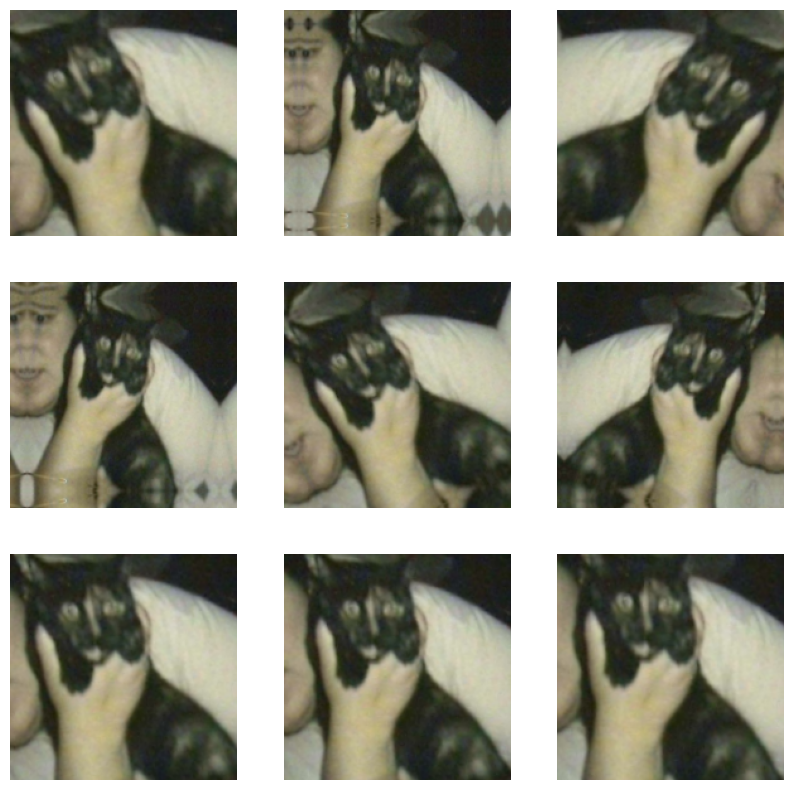

In [45]:
#checking some pictures how it looks like
plt.figure(figsize = (10,10))
for images, _ in train_dateset.take(4):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3,3,i+1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

Redefining the model

In [46]:
inputs = keras.Input(shape = (180,180,3))
x = layers.Rescaling(1./255)(inputs)
x = data_augmentation(inputs)
x = layers.Conv2D(filters=32, kernel_size=3,activation = "relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3,activation = "relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3,activation = "relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3,activation = "relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3,activation = "relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model = keras.Model(inputs = inputs, outputs = outputs)

In [47]:
from keras.mixed_precision.loss_scale_optimizer import optimizer
#complile the model
model.compile(loss = "binary_crossentropy",
              optimizer = "rmsprop",
              metrics = ["Accuracy"])

In [48]:
#settign callbacks for preventing overfitting
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = "convnet_From_scratch_with_augmentation.keras",
        save_best_only = True,
        monitor = "val_loss"
    )
]


In [49]:
# running the model
history = model.fit(
    train_dateset , 
    epochs = 100,
    validation_data = validation_dateset,
    callbacks=callbacks)

Epoch 1/100
63/63 [==============================] - 7s 70ms/step - loss: 30.7547 - Accuracy: 0.5265 - val_loss: 0.6845 - val_Accuracy: 0.5460
Epoch 2/100
63/63 [==============================] - 6s 88ms/step - loss: 1.0199 - Accuracy: 0.5265 - val_loss: 0.7260 - val_Accuracy: 0.5010
Epoch 3/100
63/63 [==============================] - 4s 65ms/step - loss: 0.7457 - Accuracy: 0.5210 - val_loss: 0.6752 - val_Accuracy: 0.5800
Epoch 4/100
63/63 [==============================] - 4s 63ms/step - loss: 0.7077 - Accuracy: 0.5450 - val_loss: 0.7586 - val_Accuracy: 0.5180
Epoch 5/100
63/63 [==============================] - 7s 100ms/step - loss: 0.7135 - Accuracy: 0.5670 - val_loss: 0.6635 - val_Accuracy: 0.5910
Epoch 6/100
63/63 [==============================] - 4s 64ms/step - loss: 0.6849 - Accuracy: 0.6290 - val_loss: 0.6354 - val_Accuracy: 0.6430
Epoch 7/100
63/63 [==============================] - 6s 88ms/step - loss: 0.7146 - Accuracy: 0.6035 - val_loss: 0.7104 - val_Accuracy: 0.5320
Epoc

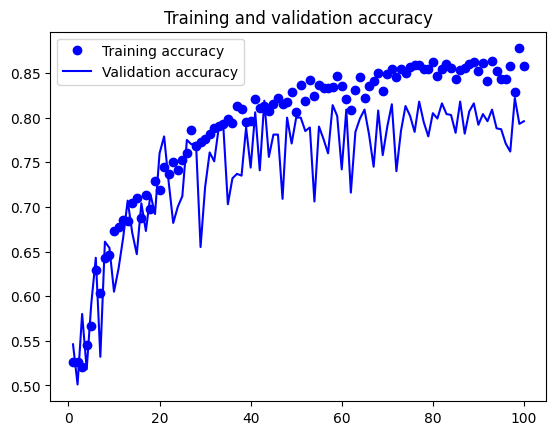

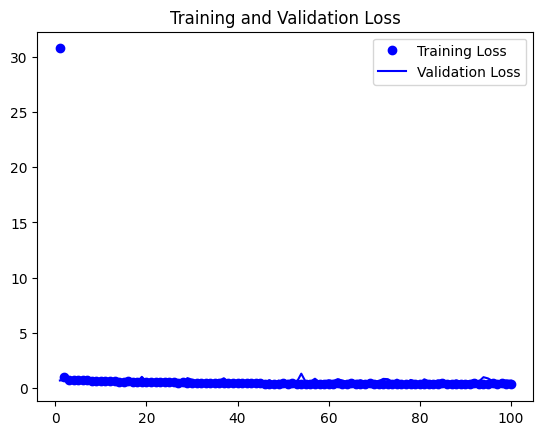

In [51]:
accuracy = history.history['Accuracy']
val_accuracy = history.history['val_Accuracy']
loss = history.history['loss']
val_loss = history.history["val_loss"]
epochs = range ( 1 , len(accuracy)+1 )

plt.plot(epochs, accuracy, "bo", label = "Training accuracy")
plt.plot(epochs, val_accuracy, "b", label = "Validation accuracy")
plt.title ("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs,loss, "bo",label = "Training Loss")
plt.plot(epochs,val_loss, "b",label = "Validation Loss")
plt.title("Training and Validation Loss")
plt.legend()
plt.show()

In [58]:
#model Evlaution
test_model = keras.models.load_model("convnet_From_scratch_with_augmentation.keras")
test_loss , test_acc = test_model.evaluate(test_dateset)
print(f"Test accuracy: {test_acc:.3f}")

63/63 [==============================] - 3s 34ms/step - loss: 0.5152 - Accuracy: 0.8065
Test accuracy: 0.807
